##### Projet CO2 par Polina, Vincent, Denis

Ce notebook:
entraine un modèle de classification pour prédiction

Prend en entrée les fichiers:
    (processed)/X_test_scaled.csv, X_train_scaled.csv, y_test_cat.csv, y_train_cat.csv : les données scalées et donc forcément préalablement séparées en jeux de train/test.

Fournit en sortie les fichiers:

     (models)/?.pkl à déterminer


In [24]:
# Pour une exécution indépendante des travaux sur chaque modèle: Charger les données depuis les fichiers CSV

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('future.no_silent_downcasting', True)
              
def load_our_data_cat():
    # charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
    %run init_notebook.py

    X_train_scaled = pd.read_csv(base_processed + 'X_train_scaled.csv')
    X_test_scaled = pd.read_csv(base_processed + 'X_test_scaled.csv')
    y_train = pd.read_csv(base_processed + 'y_train_cat.csv')
    y_test = pd.read_csv(base_processed + 'y_test_cat.csv')
    X_train_scaled = X_train_scaled.replace({False: 0, True: 1}).astype(float)
    X_test_scaled = X_test_scaled.replace({False: 0, True: 1}).astype(float)
    #
    y_column = "categorie"
    y_train = y_train[y_column]
    y_test = y_test[y_column]
    return X_train_scaled, X_test_scaled, y_train, y_test


# Classification par k-NN

In [25]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "16"  # nombre de cœurs physiques réels


In [26]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data_cat()

In [27]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score

# Initialiser le modèle k-NN avec le k choisi
knn_model = KNeighborsClassifier(n_neighbors=99)

# Entraîner le modèle
knn_model.fit(X_train_scaled, y_train)

# Prédire les classes sur les données de test
y_pred = knn_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle k-NN : {accuracy:.2f}")

# Afficher un rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

# Calcul et affichage du F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score : {f1:.2f}")

# Calcul et affichage du rappel (recall)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall : {recall:.2f}")


Précision du modèle k-NN : 0.81
Rapport de classification :
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2887
         2.0       0.71      0.58      0.64      1441
         3.0       0.79      0.84      0.81      6138
         4.0       0.76      0.77      0.76      5435
         5.0       0.80      0.79      0.80      5061
         6.0       0.82      0.78      0.80      2610
         7.0       0.86      0.89      0.88      1163

    accuracy                           0.81     24735
   macro avg       0.82      0.81      0.81     24735
weighted avg       0.81      0.81      0.81     24735

Matrice de confusion :
[[2882    2    1    1    1    0    0]
 [   2  832  588    8   11    0    0]
 [   5  325 5129  645   31    3    0]
 [   5    9  714 4200  490   15    2]
 [   1    0   42  673 3983  344   18]
 [   1    0    0    7  424 2025  153]
 [   0    0    0   12   14   97 1040]]
F1-Score : 0.81
Recall : 0.81


Résultats pour k=5:
Précision du modèle k-NN : 0.88
Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00      2887
         2.0       0.77      0.71      0.74      1441
         3.0       0.86      0.88      0.87      6138
         4.0       0.84      0.85      0.84      5435
         5.0       0.88      0.87      0.88      5061
         6.0       0.91      0.89      0.90      2610
         7.0       0.94      0.94      0.94      1163

    accuracy                           0.88     24735
   macro avg       0.88      0.88      0.88     24735
weighted avg       0.88      0.88      0.88     24735

Matrice de confusion :  
[[2883  2   1   0   1   0   0]  
 [   4 1030  399    6    2    0    0]  
 [   5  292 5383  451    7    0    0]  
 [   5   11  452 4599  366    0    2]  
 [   1    3   11  440 4409  183   14]  
 [   1    0    1    3  223 2326   56]  
 [   0    0    0    1    6   59 1097]]  
F1-Score : 0.88  
Recall : 0.88  
  
On observe que la classe 2 est la moins bien prédite, le modèle en place une bonne partie dans la classe 3  

Avec k=7 ce sont quasiment les mêmes chiffres.
Avec k=3 les résultats sont un peu moins bons.  
Avec k=4, selon les classes, on peut considérer que les résultats sont meilleurs.

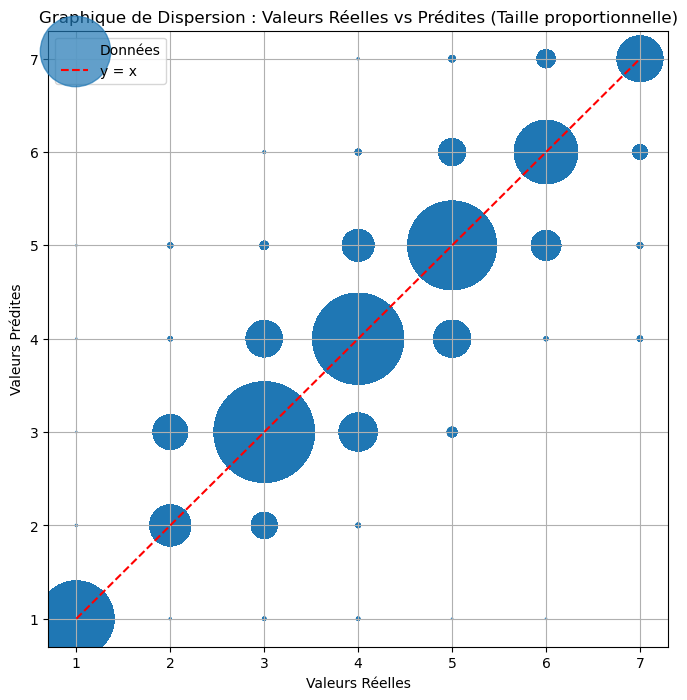

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Combiner y_test et y_pred dans un DataFrame pour calculer les fréquences
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
data['count'] = data.groupby(['y_test', 'y_pred'])['y_test'].transform('count')

# Taille des points proportionnelle à la fréquence
sizes = data['count']

# Tracer le graphique
plt.figure(figsize=(8, 8))
plt.scatter(data['y_test'], data['y_pred'], s=sizes, alpha=0.7, label='Données')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x')
plt.title("Graphique de Dispersion : Valeurs Réelles vs Prédites (Taille proportionnelle)")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)
plt.legend()
plt.show()


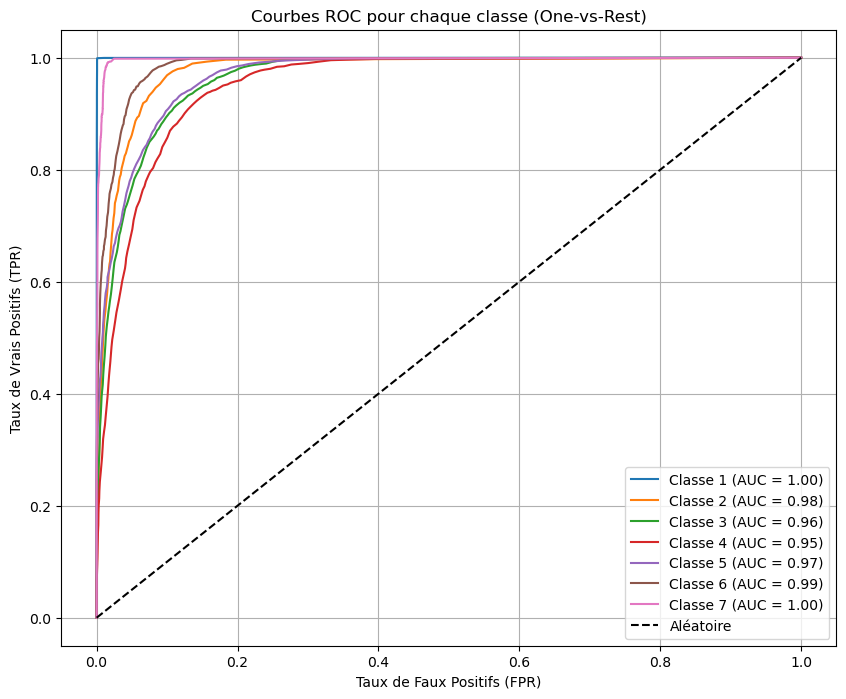

In [30]:
# courbe ROC pour nos 7 classes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarisation des labels (OvR, One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7])

# Obtenir les probabilités prédites pour chaque classe
y_pred_proba = knn_model.predict_proba(X_test_scaled)

# Initialiser le graphique
plt.figure(figsize=(10, 8))

# Tracer la courbe ROC pour chaque classe
for i in range(7):  # Nombre de classes
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {i+1} (AUC = {roc_auc:.2f})')

# Ligne diagonale (aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label="Aléatoire")

# Personnalisation du graphique
plt.title("Courbes ROC pour chaque classe (One-vs-Rest)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [31]:
import joblib

# Chemin pour enregistrer le modèle
model_path = base_models + 'knn_cat.pkl'

# Enregistrer le modèle
joblib.dump(knn_model, model_path)

print(f"Modèle k-NN enregistré dans {model_path}")


Modèle k-NN enregistré dans ../models/knn_cat.pkl
